In [29]:
import numpy as np

from tools._graphtools import *
from tools._vectools import *  
from tools._counttools import *

from scipy.linalg import expm
import tqdm as tqdm
np.set_printoptions(precision=3,suppress=True,linewidth=np.inf)

In [30]:
neck = gen_necklace(2)

In [31]:
X = [2]
AFB = 2*np.pi/X[0]

ftree = generate_ft(X)
ftree.construct_fluxed()
rand = generate_rgc(ftree,neck)

rand.construct_fluxed()
rand.construct_adj()

[3, 2]
[4, 5]


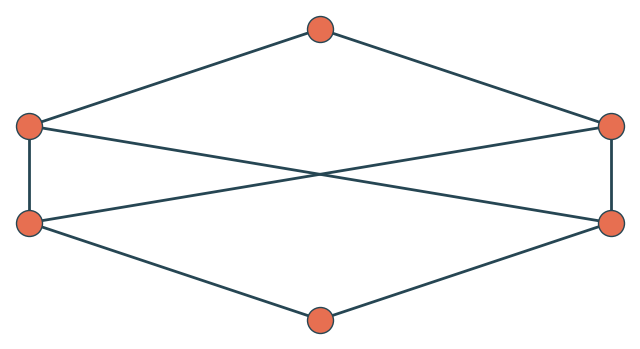

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed

pl_graph(axes, rand, positions=rgc_coords(X,xd=3,yd=1), vertex_size=350,outline_weight = 1, edge_weight=2,margin=.2)

plt.show()

In [33]:
X = [2,2]
fluxed_adj = rgc_mat(X)
rgc_graph = shift_graph(graph_from_fluxed(fluxed_adj),1)
rgc_graph.construct_adj()


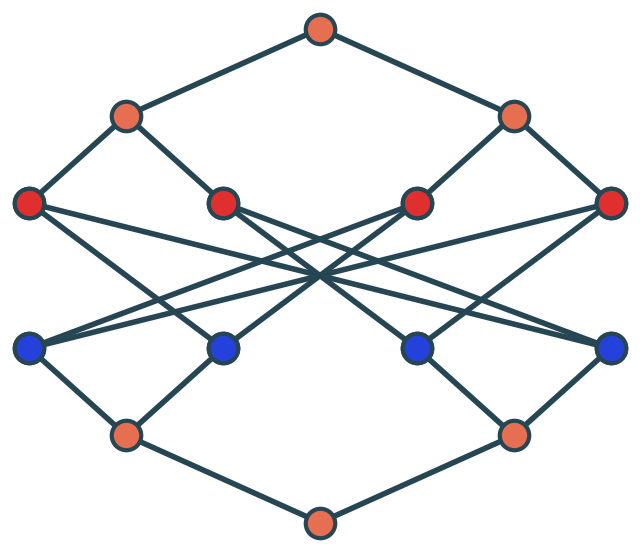

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed

r = [4,5,6,7]
b = [8,9,10,11]
pl_graph(axes, rgc_graph, positions=rgc_coords(X,xd=3,yd=1.8,spacing=1.5), vertex_size=450,outline_weight = 3, edge_weight=4,margin=.2, special_colors=["#e02f2f","#2541db"], special_indices=[r,b])

plt.savefig("RGC.pdf", bbox_inches="tight")

plt.show()

In [35]:
necklace_adj = permute_bipartite_adjacency(B_l(4), np.eye(4),np.eye(4))
neck_graph = graph_from_adj(necklace_adj)

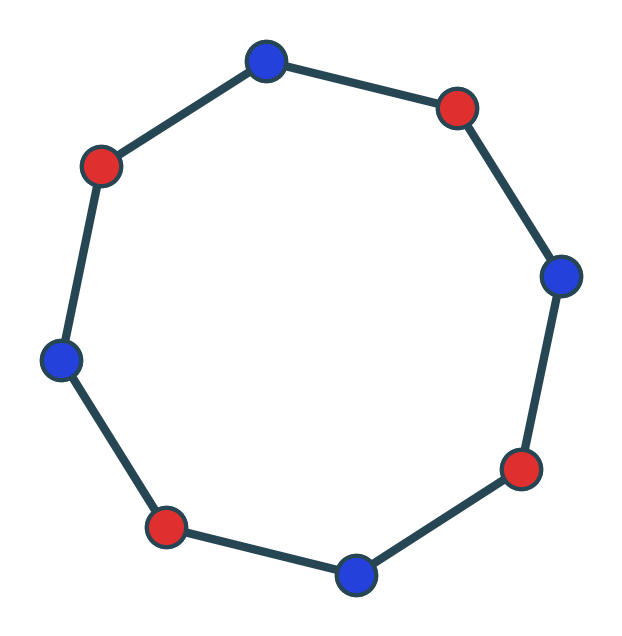

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed

r = [0,1,2,3]
b = [4,5,6,7]
pl_graph(axes, neck_graph, vertex_size=800,outline_weight = 3, edge_weight=6,margin=.2, special_colors=["#e02f2f","#2541db"], special_indices=[r,b])

plt.savefig("necklace.pdf", bbox_inches="tight")

plt.show()

In [48]:
n = 3
necks = enumerate_necklaces(n)
O = [direct_sum(neck_permute(neck)[0],neck_permute(neck)[1] ) for neck in necks]


In [49]:
O

[array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
      

In [50]:
def is_close_to_any(mat, mat_set, tol=1e-10):
    """Check if mat is numerically close to any matrix in mat_set."""
    return any(np.allclose(mat, candidate, atol=tol) for candidate in mat_set)

def check_closure(neck_mats, tol=1e-10):
    """Check if the set of matrices is closed under multiplication."""
    closed=True
    illegal_pairs = []
    n = len(neck_mats)
    for i in range(n):
        for j in range(n):
            product = neck_mats[i] @ neck_mats[j]
            if not is_close_to_any(product, neck_mats, tol=tol):
                illegal_pairs.append([i,j])
                closed=False
    return closed, illegal_pairs

In [51]:
check_closure(O)

(False, [[0, 1], [0, 4], [1, 0], [1, 5], [4, 0], [4, 5], [5, 1], [5, 4]])

In [52]:
O[1]

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]])

In [53]:
O[2]

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [54]:
O[0]@O[1]

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [44]:
test_g = graph_from_adj(rgc_mat_from_O([3], O[0]@O[1]))
test_g.construct_adj()


In [45]:
test_g.node_map

{4: <_graphtools.Node at 0x119138e50>,
 0: <_graphtools.Node at 0x118c8d860>,
 2: <_graphtools.Node at 0x119139080>,
 6: <_graphtools.Node at 0x119138c90>,
 3: <_graphtools.Node at 0x119138ec0>,
 7: <_graphtools.Node at 0x119138ad0>,
 1: <_graphtools.Node at 0x119138fa0>,
 5: <_graphtools.Node at 0x119138de0>}